In [191]:
import model_utils as mu
mu.DEATH_RATE = 0.36
mu.ICU_RATE = 0.78
mu.HOSPITAL_RATE = 2.18
mu.SYMPTOM_RATE = 10.2
mu.INFECT_2_HOSPITAL_TIME = 11
mu.HOSPITAL_2_ICU_TIME = 4
mu.ICU_2_DEATH_TIME = 4
mu.ICU_2_RECOVER_TIME = 7
mu.NOT_ICU_DISCHARGE_TIME = 5

In [192]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

In [ ]:
vietnam = mu.get_data_by_country('Vietnam')

> c:\users\quoc\bitbucket\covid-19\prognosis\model_utils.py(80)get_data_by_country()
-> new = process_local_data(local_data)
(Pdb) n
> c:\users\quoc\bitbucket\covid-19\prognosis\model_utils.py(81)get_data_by_country()
-> return new
(Pdb) new
               0
2020-07-30   0.0
2020-07-31   3.0
2020-08-01   3.0
2020-08-02   6.0
2020-08-03   7.0
2020-08-04   8.0
2020-08-05   9.0
2020-08-06  10.0
2020-08-07  10.0
2020-08-08  10.0
2020-08-09  13.0


In [408]:
vietnam.head(10)

,0
2020-07-31,3.0
2020-08-01,3.0
2020-08-02,6.0
2020-08-03,7.0
2020-08-04,8.0
2020-08-05,9.0
2020-08-06,10.0
2020-08-07,10.0
2020-08-08,10.0
2020-08-09,13.0


In [415]:
import imp; imp.reload(mu)

<module 'model_utils' from 'C:\\Users\\Quoc\\bitbucket\\covid-19\\prognosis\\model_utils.py'>

In [412]:
daily_metrics, cum_metrics, model_beta = mu.get_metrics_by_country('Vietnam', lockdown_date='20200728')

> c:\users\quoc\bitbucket\covid-19\prognosis\model_utils.py(346)get_daily_metrics_from_death_data()
-> get_daily_predicted_death(local_death_data, forecast_horizon, lockdown_date,
(Pdb) p local_death_data
               0
2020-07-31   3.0
2020-08-01   3.0
2020-08-02   6.0
2020-08-03   7.0
2020-08-04   8.0
2020-08-05   9.0
2020-08-06  10.0
2020-08-07  10.0
2020-08-08  10.0
2020-08-09  13.0
(Pdb) n
> c:\users\quoc\bitbucket\covid-19\prognosis\model_utils.py(347)get_daily_metrics_from_death_data()
-> relax_date, contain_rate)
(Pdb) n


C:\Users\Quoc\bitbucket\covid-19\prognosis\model_utils.py:264: RuntimeWarning:

divide by zero encountered in log

C:\Users\Quoc\bitbucket\covid-19\prognosis\model_utils.py:282: RuntimeWarning:

invalid value encountered in less



Use default last slope due to not enough data
> c:\users\quoc\bitbucket\covid-19\prognosis\model_utils.py(348)get_daily_metrics_from_death_data()
-> upper_length_death = daily_predicted_death_ub - daily_predicted_death
(Pdb) n
> c:\users\quoc\bitbucket\covid-19\prognosis\model_utils.py(349)get_daily_metrics_from_death_data()
-> upper_length_derived = (upper_length_death*1/np.sqrt(test_rate)).astype('int', errors='ignore')
(Pdb) n
> c:\users\quoc\bitbucket\covid-19\prognosis\model_utils.py(350)get_daily_metrics_from_death_data()
-> lower_length_death = daily_predicted_death - daily_predicted_death_lb
(Pdb) n
> c:\users\quoc\bitbucket\covid-19\prognosis\model_utils.py(351)get_daily_metrics_from_death_data()
-> lower_length_derived = (lower_length_death * 1 / np.sqrt(test_rate)).astype('int', errors='ignore')
(Pdb) n
> c:\users\quoc\bitbucket\covid-19\prognosis\model_utils.py(353)get_daily_metrics_from_death_data()
-> daily_local_death_new = local_death_data.diff().fillna(0)
(Pdb) n
> c:\

BdbQuit: 

In [407]:
cum_metrics.head(30)

,death,predicted_death,lower_bound,upper_bound,infected,symptomatic,hospitalized,confirmed,ICU,hospital_beds
2020-07-12,NaN,NaN,NaN,NaN,337.888603,NaN,NaN,2.0,NaN,NaN
2020-07-13,NaN,NaN,NaN,NaN,662.395004,NaN,NaN,3.0,NaN,NaN
2020-07-14,NaN,NaN,NaN,NaN,974.049211,NaN,NaN,3.0,NaN,NaN
2020-07-15,NaN,NaN,NaN,NaN,1273.360240,NaN,NaN,11.0,NaN,NaN
2020-07-16,NaN,NaN,NaN,NaN,1560.816946,NaN,NaN,11.0,NaN,NaN
2020-07-17,NaN,NaN,NaN,NaN,1836.888824,NaN,NaN,12.0,NaN,NaN
2020-07-18,NaN,NaN,NaN,NaN,2102.026775,NaN,NaN,12.0,NaN,NaN
2020-07-19,NaN,NaN,NaN,NaN,2356.663841,NaN,NaN,13.0,NaN,NaN
2020-07-20,NaN,NaN,NaN,NaN,2601.215913,NaN,NaN,14.0,NaN,NaN
2020-07-21,NaN,NaN,NaN,NaN,2836.082411,NaN,NaN,31.0,NaN,NaN


In [207]:
daily_metrics, cum_metrics, model_beta = mu.get_metrics_by_country('Iraq', lockdown_date='20200322', relax_date='20200411')

C:\Users\Quoc\bitbucket\covid-19\prognosis\model_utils.py:263: RuntimeWarning:

divide by zero encountered in log



In [208]:
import plotly.offline as py_offline
import cufflinks as cf
cf.go_offline()
py_offline.__PLOTLY_OFFLINE_INITIALIZED = True

In [209]:
daily_metrics.iplot()

In [210]:
cum_metrics.iplot()

In [211]:
import SEIR

In [212]:
daily_metrics.death['2020/06/01']*100/mu.DEATH_RATE


2777.777777777778

In [213]:
Infected = (100/mu.DEATH_RATE)*daily_metrics.death
relax_date='20200511'
Cases = Infected.cumsum()
#Cases = Cases[Cases.index>=relax_date].dropna()
start_date ='20200420'
C = np.array(Cases.iloc[:])
N = 38430000 # the population of Iraq
r0 = cum_metrics.infected[start_date]
i0=C[0]-r0
I0 = [i0] 
E0 = i0*0.2*range(10)

In [214]:
Cases['2020/06/01']

59166.66666666664

In [215]:
type(Cases)

pandas.core.series.Series

In [244]:
import imp; imp.reload(SEIR)

<module 'SEIR' from 'C:\\Users\\Quoc\\bitbucket\\covid-19\\prognosis\\SEIR.py'>

In [275]:
def predict_cumulative_infected_cases_SEIR(cumulative_infected_cases, N, start_date, C0=None, forecast_horizon=60):
    """
    N: total population
    SEIR is started at the start date with initial cumulative cases is set by C0. 
    If not set, C0 is the observed cumulative cases. This is very different from confirmed cases
    Assumption: initial recovery is equal to cumulative cases at offset_days(19) days ago
    """
    start_date = pd.to_datetime(start_date)
    offset_days = dt.timedelta(mu.INFECT_2_HOSPITAL_TIME)
    Cpast = cumulative_infected_cases[cumulative_infected_cases.index>=start_date].dropna()
    if C0 is None:
        C0 = Cpast[0]
    r0 = cumulative_infected_cases.loc[start_date - offset_days]
    #r0 = 0.9*C0 
    print(r0)
    i0 = C0-r0
    E0 = i0*0.2*range(10)
    best = np.inf
    res = (0, 0, 0)
    t = np.arange(len(Cpast))
    for e0 in E0:        
        y0 = [N-e0-i0-r0, e0, i0, r0]
        opt, val = SEIR.minimization(y0, t, Cpast, N, 50)
        if (val < best):
            besty0 = y0
            res = opt
            best = val
        print((e0, i0, best))
    tau = np.arange(len(Cpast)+forecast_horizon)
    out_seir = SEIR.dynamics(besty0, tau, N, *res)
    fitted = out_seir[:,2]+out_seir[:,3]
    date_range = Cpast.index.append(pd.date_range(start=Cpast.index[-1]+dt.timedelta(1), periods=forecast_horizon))
    print(res)
    return pd.DataFrame({'predicted_infected':fitted}, index=date_range)

In [229]:
predicted_cases = predict_cumulative_infected_cases_SEIR(Cases, N, start_date='2020/04/29', forecast_horizon=365)

22499.99999999999


C:\Users\Quoc\anaconda3\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning:

Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.

C:\Users\Quoc\anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated

C:\Users\Quoc\anaconda3\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning:

Illegal input detected (internal error). Run with full_output = 1 to get quantitative information.

C:\Users\Quoc\bitbucket\covid-19\prognosis\SEIR.py:23: RuntimeWarning:

overflow encountered in exp

C:\Users\Quoc\anaconda3\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning:

Repeated convergence failures (perhaps bad Jacobian or tolerances). Run with full_output = 1 to get quantitative information.



(0.0, 2499.9999999999964, 0.06634542462599416)
(499.9999999999993, 2499.9999999999964, 0.0663137227008465)
(999.9999999999986, 2499.9999999999964, 0.0663137227008465)
(1499.999999999998, 2499.9999999999964, 0.0663137227008465)
(1999.9999999999973, 2499.9999999999964, 0.0663137227008465)
(2499.9999999999964, 2499.9999999999964, 0.0663137227008465)
(2999.999999999996, 2499.9999999999964, 0.0663137227008465)


C:\Users\Quoc\anaconda3\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning:

Excess accuracy requested (tolerances too small). Run with full_output = 1 to get quantitative information.



Error - curve_fit failed
(3499.9999999999955, 2499.9999999999964, 0.0663137227008465)
(3999.9999999999945, 2499.9999999999964, 0.0663137227008465)
(4499.999999999994, 2499.9999999999964, 0.0663137227008465)
[  2.92073366  -7.27541163 -37.09987848]


In [219]:
predicted_cases = predict_cumulative_infected_cases_SEIR(Cases, N, start_date='2020/04/29', forecast_horizon=365)

22499.99999999999
(0.0, 2499.9999999999964, 524142843805.50665)
(499.9999999999993, 2499.9999999999964, 38355256683.966095)
(999.9999999999986, 2499.9999999999964, 38355256683.966095)


C:\Users\Quoc\anaconda3\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning:

Excess accuracy requested (tolerances too small). Run with full_output = 1 to get quantitative information.



Error - curve_fit failed
(1499.999999999998, 2499.9999999999964, 36028291638.91179)
(1999.9999999999973, 2499.9999999999964, 36028291638.91179)
(2499.9999999999964, 2499.9999999999964, 36028291638.91179)
(2999.999999999996, 2499.9999999999964, 36028291638.91179)
(3499.9999999999955, 2499.9999999999964, 36028291638.91179)
(3999.9999999999945, 2499.9999999999964, 36028291638.91179)
(4499.999999999994, 2499.9999999999964, 36028291638.91179)
[  2.92009257  -7.27550362 -26.60075268]


In [230]:
daily_predicted_case = mu.get_daily_data(predicted_cases)

In [231]:
predicted_cases[1:]

,predicted_infected
2020-04-30,2.501640e+04
2020-05-01,2.506508e+04
2020-05-02,2.514660e+04
2020-05-03,2.526194e+04
2020-05-04,2.541251e+04
...,...
2021-08-01,9.640855e+06
2021-08-02,9.660780e+06
2021-08-03,9.680692e+06
2021-08-04,9.700590e+06


In [232]:
daily_predicted_case[1:].head()

,predicted_infected
2020-04-30,16.401356
2020-05-01,48.679829
2020-05-02,81.520124
2020-05-03,115.339675
2020-05-04,150.565859


In [233]:
log_daily_predicted_case = np.log(daily_predicted_case[1:]*(mu.DEATH_RATE/100))

In [234]:
log_daily_predicted_case.head()

,predicted_infected
2020-04-30,-2.829457
2020-05-01,-1.741557
2020-05-02,-1.225972
2020-05-03,-0.878940
2020-05-04,-0.612421


In [225]:
log_fit, params = mu.get_log_daily_predicted_death_by_country('Iraq', lockdown_date='20200322', relax_date='20200411')

C:\Users\Quoc\bitbucket\covid-19\prognosis\model_utils.py:458: RuntimeWarning:

divide by zero encountered in log

C:\Users\Quoc\bitbucket\covid-19\prognosis\model_utils.py:263: RuntimeWarning:

divide by zero encountered in log



In [188]:
sum(params[1:])

0.07019206117982296

In [235]:
log_fit.merge(log_daily_predicted_case, left_index=True, right_index=True, how='left').iplot()

In [126]:
log_fit.merge(log_daily_predicted_case, left_index=True, right_index=True, how='left').iplot()

In [108]:
log_fit.merge(log_daily_predicted_case, left_index=True, right_index=True, how='left').iplot()

In [95]:
log_fit.merge(log_daily_predicted_case, left_index=True, right_index=True, how='left').iplot()

In [85]:
log_fit.merge(log_daily_predicted_case, left_index=True, right_index=True, how='left').iplot()

In [190]:
mu.get_daily_data(predicted_cases).merge(mu.get_daily_data(Cases), left_index=True, right_index=True, how='left').iplot()

C:\Users\Quoc\anaconda3\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning:

Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.

C:\Users\Quoc\anaconda3\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning:

Repeated convergence failures (perhaps bad Jacobian or tolerances). Run with full_output = 1 to get quantitative information.

C:\Users\Quoc\anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated

C:\Users\Quoc\anaconda3\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning:

Illegal input detected (internal error). Run with full_output = 1 to get quantitative information.

C:\Users\Quoc\bitbucket\covid-19\prognosis\SEIR.py:20: RuntimeWarning:

overflow encountered in exp



(0.0, 3786.10230978666, 47600159.764799684)
(757.2204619573321, 3786.10230978666, 46433653.4772195)
(1514.4409239146642, 3786.10230978666, 46433653.4772195)
(2271.661385871996, 3786.10230978666, 46433653.4772195)
(3028.8818478293283, 3786.10230978666, 46433653.4772195)
(3786.1023097866605, 3786.10230978666, 46433653.4772195)
(4543.322771743992, 3786.10230978666, 46433653.4772195)
(5300.543233701324, 3786.10230978666, 46433653.4772195)
(6057.763695658657, 3786.10230978666, 46433653.4772195)
(6814.984157615989, 3786.10230978666, 46433653.4772195)
(7572.204619573321, 3786.10230978666, 46433653.4772195)
(8329.425081530653, 3786.10230978666, 46433653.4772195)
(9086.645543487984, 3786.10230978666, 46433653.4772195)
(9843.866005445318, 3786.10230978666, 46433653.4772195)
(10601.086467402649, 3786.10230978666, 46433653.4772195)
(11358.306929359982, 3786.10230978666, 46433653.4772195)
(12115.527391317313, 3786.10230978666, 46433653.4772195)
(12872.747853274645, 3786.10230978666, 46433653.477219

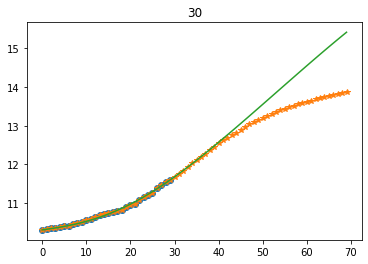

C:\Users\Quoc\anaconda3\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning:

Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.

C:\Users\Quoc\anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated

C:\Users\Quoc\anaconda3\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning:

Repeated convergence failures (perhaps bad Jacobian or tolerances). Run with full_output = 1 to get quantitative information.

C:\Users\Quoc\anaconda3\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning:

Illegal input detected (internal error). Run with full_output = 1 to get quantitative information.



(0.0, 3786.10230978666, 73311256.69698794)
(757.2204619573321, 3786.10230978666, 72255793.83910647)
(1514.4409239146642, 3786.10230978666, 72255793.83910647)
(2271.661385871996, 3786.10230978666, 72255793.83910647)
(3028.8818478293283, 3786.10230978666, 72255793.83910647)
(3786.1023097866605, 3786.10230978666, 72255793.83910647)
(4543.322771743992, 3786.10230978666, 72255793.83910647)
(5300.543233701324, 3786.10230978666, 72255793.83910647)


C:\Users\Quoc\bitbucket\covid-19\prognosis\SEIR.py:20: RuntimeWarning:

overflow encountered in exp



(6057.763695658657, 3786.10230978666, 72255793.83910647)
(6814.984157615989, 3786.10230978666, 72255793.83910647)
(7572.204619573321, 3786.10230978666, 72255793.83910647)
(8329.425081530653, 3786.10230978666, 72255793.83910647)
(9086.645543487984, 3786.10230978666, 72255793.83910647)
(9843.866005445318, 3786.10230978666, 72255793.83910647)
(10601.086467402649, 3786.10230978666, 72255793.83910647)
(11358.306929359982, 3786.10230978666, 72255793.83910647)
(12115.527391317313, 3786.10230978666, 72255793.83910647)
(12872.747853274645, 3786.10230978666, 72255793.83910647)
(13629.968315231978, 3786.10230978666, 72255793.83910647)
(14387.188777189309, 3786.10230978666, 72255793.83910647)


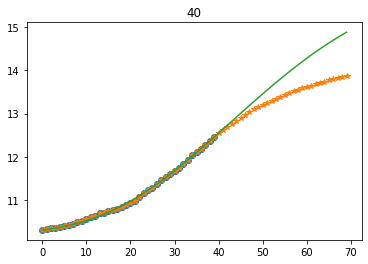

C:\Users\Quoc\anaconda3\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning:

Repeated convergence failures (perhaps bad Jacobian or tolerances). Run with full_output = 1 to get quantitative information.

C:\Users\Quoc\anaconda3\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning:

Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.

C:\Users\Quoc\anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated

C:\Users\Quoc\bitbucket\covid-19\prognosis\SEIR.py:20: RuntimeWarning:

overflow encountered in exp

C:\Users\Quoc\anaconda3\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning:

Illegal input detected (internal error). Run with full_output = 1 to get quantitative information.



(0.0, 3786.10230978666, 703053535.5054384)
(757.2204619573321, 3786.10230978666, 701010024.1939857)
(1514.4409239146642, 3786.10230978666, 701010024.1939857)
(2271.661385871996, 3786.10230978666, 369012554.3289691)
(3028.8818478293283, 3786.10230978666, 369012554.3289691)
(3786.1023097866605, 3786.10230978666, 369012554.3289691)
(4543.322771743992, 3786.10230978666, 369012554.3289691)
(5300.543233701324, 3786.10230978666, 369012554.3289691)
(6057.763695658657, 3786.10230978666, 369012554.3289691)
(6814.984157615989, 3786.10230978666, 369012554.3289691)


C:\Users\Quoc\bitbucket\covid-19\prognosis\SEIR.py:23: RuntimeWarning:

overflow encountered in double_scalars

C:\Users\Quoc\bitbucket\covid-19\prognosis\SEIR.py:24: RuntimeWarning:

overflow encountered in double_scalars



(7572.204619573321, 3786.10230978666, 369012554.3289691)
(8329.425081530653, 3786.10230978666, 369012554.3289691)
(9086.645543487984, 3786.10230978666, 369012554.3289691)
(9843.866005445318, 3786.10230978666, 369012554.3289691)
(10601.086467402649, 3786.10230978666, 369012554.3289691)
(11358.306929359982, 3786.10230978666, 369012554.3289691)
(12115.527391317313, 3786.10230978666, 369012554.3289691)
(12872.747853274645, 3786.10230978666, 369012554.3289691)
(13629.968315231978, 3786.10230978666, 369012554.3289691)
(14387.188777189309, 3786.10230978666, 369012554.3289691)


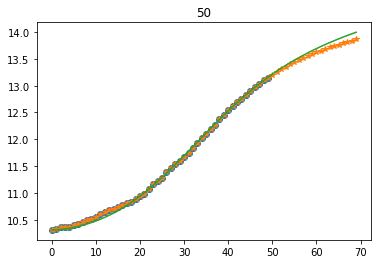

C:\Users\Quoc\anaconda3\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning:

Illegal input detected (internal error). Run with full_output = 1 to get quantitative information.

C:\Users\Quoc\anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated

C:\Users\Quoc\anaconda3\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning:

Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.

C:\Users\Quoc\anaconda3\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning:

Repeated convergence failures (perhaps bad Jacobian or tolerances). Run with full_output = 1 to get quantitative information.



(0.0, 3786.10230978666, 584580674.1485335)


C:\Users\Quoc\bitbucket\covid-19\prognosis\SEIR.py:20: RuntimeWarning:

overflow encountered in exp



(757.2204619573321, 3786.10230978666, 584580674.1485335)
(1514.4409239146642, 3786.10230978666, 583726225.9229888)
(2271.661385871996, 3786.10230978666, 583726225.9229888)
(3028.8818478293283, 3786.10230978666, 583726225.9229888)
(3786.1023097866605, 3786.10230978666, 583726225.9229888)
(4543.322771743992, 3786.10230978666, 583726225.9229888)


C:\Users\Quoc\bitbucket\covid-19\prognosis\SEIR.py:23: RuntimeWarning:

overflow encountered in double_scalars

C:\Users\Quoc\bitbucket\covid-19\prognosis\SEIR.py:24: RuntimeWarning:

overflow encountered in double_scalars



(5300.543233701324, 3786.10230978666, 583726225.9229888)
(6057.763695658657, 3786.10230978666, 583726225.9229888)
(6814.984157615989, 3786.10230978666, 583726225.9229888)
(7572.204619573321, 3786.10230978666, 580292520.3714516)
(8329.425081530653, 3786.10230978666, 579861572.9389634)
(9086.645543487984, 3786.10230978666, 579861572.9389634)
(9843.866005445318, 3786.10230978666, 579861572.9389634)
(10601.086467402649, 3786.10230978666, 578566347.5245951)
(11358.306929359982, 3786.10230978666, 578133873.4039221)
(12115.527391317313, 3786.10230978666, 578133873.4039221)
(12872.747853274645, 3786.10230978666, 578133873.4039221)
(13629.968315231978, 3786.10230978666, 578133873.4039221)
(14387.188777189309, 3786.10230978666, 578133873.4039221)


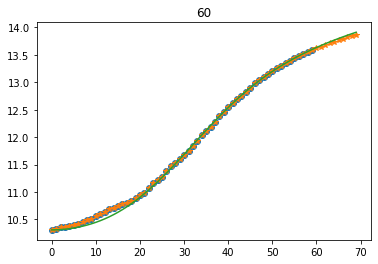

In [21]:
for n_data_point in [30, 40, 50, 60]:
    Cpast = C[0:n_data_point]

    best = np.inf
    res = (0, 0, 0)
    t = np.arange(len(Cpast))

    for e0 in E0:
        for i0 in I0:    
            y0 = [N-e0-i0-r0, e0, i0, r0]
            opt, val = SEIR.minimization(y0, t, Cpast, N, 50)
            if (val < best):
                besty0 = y0
                res = opt
                best = val
            print((e0, i0, best))

    tau = np.arange(len(C))
    out_seir = SEIR.dynamics(besty0, tau, N, *res)
    fitted = out_seir[:,2]+out_seir[:,3]
    plt.plot(t, np.log(Cpast), 'o')
    plt.plot(tau, np.log(C), '*')
    plt.plot(tau, np.log(fitted))
    plt.title('{}'.format(n_data_point))
    plt.show()

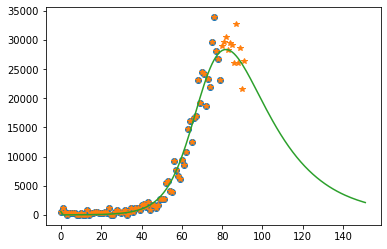

In [58]:
plt.plot(t, Ipast, 'o')
plt.plot(tau, I, '*')
plt.plot(tau, fitted)
plt.show()

In [368]:
daily_metrics, cum_metrics, model_beta = mu.get_metrics_by_country('Iran', lockdown_date='20200227', relax_date='20200420')

C:\Users\Quoc\bitbucket\covid-19\prognosis\model_utils.py:263: RuntimeWarning:

divide by zero encountered in log



In [369]:
cum_metrics.iplot()

In [370]:
Infected = (100/mu.DEATH_RATE)*daily_metrics.death
Cases = Infected.cumsum()
N = 81830000 # the population of Iraq
start_date='2020/05/19'

In [371]:
predicted_cases = predict_cumulative_infected_cases_SEIR(Cases, N, start_date=start_date, forecast_horizon=365)

1816388.8888888888


C:\Users\Quoc\anaconda3\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning:

Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.

C:\Users\Quoc\anaconda3\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning:

Repeated convergence failures (perhaps bad Jacobian or tolerances). Run with full_output = 1 to get quantitative information.

C:\Users\Quoc\anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated

C:\Users\Quoc\bitbucket\covid-19\prognosis\SEIR.py:23: RuntimeWarning:

overflow encountered in exp

C:\Users\Quoc\anaconda3\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning:

Illegal input detected (internal error). Run with full_output = 1 to get quantitative information.

C:\Users\Quoc\bitbucket\covid-19\prognosis\SEIR.py:26: RuntimeWarning:

overflow encountered in double_scalars

C:\Users\Quoc\bitbucket\covid-

(0.0, 160555.55555555574, 48741318814.24771)


C:\Users\Quoc\anaconda3\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning:

Excess accuracy requested (tolerances too small). Run with full_output = 1 to get quantitative information.



Error - curve_fit failed
(32111.11111111115, 160555.55555555574, 45069846571.40383)
(64222.2222222223, 160555.55555555574, 42430340191.41456)
Error - curve_fit failed
(96333.33333333344, 160555.55555555574, 42430340191.41456)
(128444.4444444446, 160555.55555555574, 41847956320.192505)
(160555.55555555574, 160555.55555555574, 41847956320.192505)
(192666.6666666669, 160555.55555555574, 41847956320.192505)
(224777.77777777804, 160555.55555555574, 41847956320.192505)
(256888.8888888892, 160555.55555555574, 40694580907.773346)
(289000.00000000035, 160555.55555555574, 40694580907.773346)
[121.5443254   -7.09726157 117.22963744]


In [372]:
daily_predicted_case = mu.get_daily_data(predicted_cases)
log_daily_predicted_case = np.log(daily_predicted_case[1:]*(mu.DEATH_RATE/100))
log_fit, params = mu.get_log_daily_predicted_death_by_country('Iran', lockdown_date='20200227', relax_date='20200420')

C:\Users\Quoc\bitbucket\covid-19\prognosis\model_utils.py:458: RuntimeWarning:

divide by zero encountered in log

C:\Users\Quoc\bitbucket\covid-19\prognosis\model_utils.py:263: RuntimeWarning:

divide by zero encountered in log



In [373]:
log_fit.merge(log_daily_predicted_case, left_index=True, right_index=True, how='left').iplot()

In [374]:
log_fit_adjusted = log_fit.merge(log_daily_predicted_case, left_index=True, right_index=True, how='left')

In [395]:
def decay_weight(beta, t):
    if t >= 0:
        return (1-beta)**(t)
    else:
        return 1

In [376]:
start_date = pd.to_datetime(start_date)

In [377]:
log_fit_adjusted = log_fit_adjusted.loc[log_fit_adjusted.index > start_date]

In [378]:
t_vec = (log_fit_adjusted.index - start_date).days.values

In [379]:
model_weight = [decay_weight(0.1, t-1) for t in t_vec]

In [380]:
log_fit_adjusted['model_weight'] = model_weight 

In [381]:
log_fit_adjusted['new_predict'] = log_fit_adjusted.predicted_death*log_fit_adjusted.model_weight+log_fit_adjusted.predicted_infected*(1-log_fit_adjusted.model_weight)

In [382]:
log_fit_adjusted.iplot()

In [396]:
def get_adjusted_log_daily_predicted_death_by_country(country, population, lockdown_date, relax_date, SEIR_start_date, forecast_horizon):
    daily_metrics, cum_metrics, model_beta = mu.get_metrics_by_country(country, lockdown_date=lockdown_date, relax_date=relax_date)
    Infected = (100/mu.DEATH_RATE)*daily_metrics.death
    Cases = Infected.cumsum()
    #N = 81830000 # the population of Iraq
    #start_date='2020/05/19'
    predicted_cases = predict_cumulative_infected_cases_SEIR(Cases, population, start_date=SEIR_start_date, 
                                                             forecast_horizon=forecast_horizon)
    daily_predicted_case = mu.get_daily_data(predicted_cases)
    log_daily_predicted_case = np.log(daily_predicted_case[1:]*(mu.DEATH_RATE/100))
    log_fit, params = mu.get_log_daily_predicted_death_by_country(country, lockdown_date=lockdown_date, relax_date=relax_date)
    log_fit_adjusted = log_fit.merge(log_daily_predicted_case, left_index=True, right_index=True, how='left')
    start_date = pd.to_datetime(SEIR_start_date)
    #log_fit_adjusted = log_fit_adjusted.loc[log_fit_adjusted.index > start_date]
    t_vec = (log_fit_adjusted.index - start_date).days.values
    model_weight = [decay_weight(0.05, t-1) for t in t_vec]
    log_fit_adjusted['model_weight'] = model_weight 
    log_fit_adjusted['new_predict'] = log_fit_adjusted.predicted_death*log_fit_adjusted.model_weight+log_fit_adjusted.predicted_infected*(1-log_fit_adjusted.model_weight)

    return log_fit_adjusted

In [399]:
log_fit_adjusted = get_adjusted_log_daily_predicted_death_by_country(country='Iran', 
                                                                     population=81830000, lockdown_date='20200227', relax_date='20200420',
                                                                     SEIR_start_date='20200520', forecast_horizon=365)
log_fit_adjusted.iplot()

C:\Users\Quoc\bitbucket\covid-19\prognosis\model_utils.py:263: RuntimeWarning:

divide by zero encountered in log



1829722.222222222


C:\Users\Quoc\anaconda3\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning:

Illegal input detected (internal error). Run with full_output = 1 to get quantitative information.

C:\Users\Quoc\anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated

C:\Users\Quoc\bitbucket\covid-19\prognosis\SEIR.py:26: RuntimeWarning:

overflow encountered in double_scalars

C:\Users\Quoc\bitbucket\covid-19\prognosis\SEIR.py:27: RuntimeWarning:

overflow encountered in double_scalars

C:\Users\Quoc\anaconda3\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning:

Repeated convergence failures (perhaps bad Jacobian or tolerances). Run with full_output = 1 to get quantitative information.

C:\Users\Quoc\anaconda3\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning:

Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.

C:\Users\Quoc\bitbu

(0.0, 165000.00000000023, 33696011489.517563)
(33000.00000000005, 165000.00000000023, 33696011489.517563)


C:\Users\Quoc\bitbucket\covid-19\prognosis\SEIR.py:28: RuntimeWarning:

overflow encountered in double_scalars



(66000.0000000001, 165000.00000000023, 33294136240.72524)
(99000.00000000015, 165000.00000000023, 33294136240.72524)
(132000.0000000002, 165000.00000000023, 32701192065.506096)
(165000.00000000026, 165000.00000000023, 32701192065.506096)
(198000.0000000003, 165000.00000000023, 32701192065.506096)


C:\Users\Quoc\anaconda3\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning:

Excess accuracy requested (tolerances too small). Run with full_output = 1 to get quantitative information.



Error - curve_fit failed
(231000.00000000035, 165000.00000000023, 32701192065.506096)
Error - curve_fit failed
(264000.0000000004, 165000.00000000023, 31720547679.6695)
(297000.00000000047, 165000.00000000023, 31478132894.2702)
[198.05465717  -7.09227391 193.74211483]


C:\Users\Quoc\bitbucket\covid-19\prognosis\model_utils.py:458: RuntimeWarning:

divide by zero encountered in log

C:\Users\Quoc\bitbucket\covid-19\prognosis\model_utils.py:263: RuntimeWarning:

divide by zero encountered in log



In [388]:
log_fit_adjusted.iplot()

In [397]:
log_fit_adjusted = get_adjusted_log_daily_predicted_death_by_country(country='Iraq', 
                                                                     population=38430000, lockdown_date='20200322', relax_date='20200411',
                                                                     SEIR_start_date='20200520', forecast_horizon=365)

C:\Users\Quoc\bitbucket\covid-19\prognosis\model_utils.py:263: RuntimeWarning:

divide by zero encountered in log



29166.666666666646


C:\Users\Quoc\anaconda3\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning:

Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.

C:\Users\Quoc\anaconda3\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning:

Excess accuracy requested (tolerances too small). Run with full_output = 1 to get quantitative information.



Error - curve_fit failed


C:\Users\Quoc\anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated

C:\Users\Quoc\anaconda3\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning:

Illegal input detected (internal error). Run with full_output = 1 to get quantitative information.

C:\Users\Quoc\bitbucket\covid-19\prognosis\SEIR.py:23: RuntimeWarning:

overflow encountered in exp

C:\Users\Quoc\anaconda3\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning:

Repeated convergence failures (perhaps bad Jacobian or tolerances). Run with full_output = 1 to get quantitative information.



(0.0, 7499.999999999996, 24873416519.878822)
Error - curve_fit failed
(1499.9999999999993, 7499.999999999996, 24873416519.878822)
(2999.9999999999986, 7499.999999999996, 24873416519.878822)
(4499.999999999998, 7499.999999999996, 24873416519.878822)
(5999.999999999997, 7499.999999999996, 24873416519.878822)
(7499.999999999996, 7499.999999999996, 24873416519.878822)
(8999.999999999996, 7499.999999999996, 24873416519.878822)
Error - curve_fit failed
(10499.999999999995, 7499.999999999996, 24873416519.878822)
Error - curve_fit failed
(11999.999999999995, 7499.999999999996, 24873416519.878822)
(13499.999999999995, 7499.999999999996, 24873416519.878822)
[  3.64389112  -7.30482801 -38.60104456]


C:\Users\Quoc\bitbucket\covid-19\prognosis\model_utils.py:458: RuntimeWarning:

divide by zero encountered in log

C:\Users\Quoc\bitbucket\covid-19\prognosis\model_utils.py:263: RuntimeWarning:

divide by zero encountered in log



In [398]:
log_fit_adjusted.iplot()